In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('df_final_chapter_1.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [7]:
df= df.drop('Unnamed: 0', axis = 1)

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [9]:
items_to_remove = ['ID', 'SEX',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',  'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university','default payment next month']

In [10]:
features = df.columns.tolist()
features

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [11]:
#feature_response = [item in item for features if item not in items_to_remove]

In [12]:
feature_response = []
for item in features:
    if item not in items_to_remove:
        feature_response.append(item)
        
feature_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [13]:
feature_response = feature_response
feature_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [14]:
X = df[feature_response].values

In [15]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, df['default payment next month'].values, test_size = 0.2, random_state= 24)

In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 1000)

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipe_line = Pipeline(steps = [('scaler', min_max_sc), ('model', lr)])

In [55]:
pipe_line.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [56]:
pipe_line.get_params()['model__C']

1.0

In [57]:
pipe_line.set_params(steps = [('model', LogisticRegression(C = 5))])

Pipeline(steps=[('model', LogisticRegression(C=5))])

In [58]:
c_vals = np.linspace(2,-3,6)
c_vals

array([ 2.,  1.,  0., -1., -2., -3.])

In [59]:
c_val_exp = 10**c_vals
c_val_exp

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [60]:
def cross_val_C_search1(c_vals):
    for i in range(len(c_vals)):
        x_train, x_test, y_train, y_test = train_test_split(df[feature_response].values,df['default payment next month'].values, test_size = 0.2, random_state= 24)
        lr = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 1000, C = c_vals[i])
        pipe_line = Pipeline(steps=[('scaler',min_max_sc),('model',lr)])
        
        pipe_line.fit(x_train,y_train)
        
        print('train score for C = ',c_vals[i],'==>',pipe_line.score(x_train,y_train).round(2))
        print('test score for C = ',c_vals[i],'==>',pipe_line.score(x_test,y_test).round(2))
        
    
    

In [61]:
#cross_val_C_search(c_val_exp)

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [63]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits = 4, shuffle = False, random_state= None)

In [64]:
def cross_val_search(k_folds,C_vals,pipeline,X,Y):
    n_folds = k_folds.n_splits
    
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    
    cv_test_roc = [[]]*len(C_vals)
    
    for c_val_counter in range(len(C_vals)):
        pipeline.set_params(model__C = C_vals[c_val_counter])
        fold_counter = 0
        
        for train_index, test_index in k_folds.split(X,Y):
            x_cv_train, y_cv_train = X[train_index], Y[train_index]
            x_cv_test, y_cv_test = X[test_index], Y[test_index]
            
            
            pipeline.fit(x_cv_train, y_cv_train)
            
            
            #get train_roc_auc
            
            y_train_predict_prob = pipeline.predict_proba(x_cv_train)
            cv_test_roc_auc[fold_counter,c_val_counter] = roc_auc_score(y_cv_train, y_train_predict_prob[:,1])
            
           #get test_roc_auc
        
            y_test_predict_prob = pipeline.predict_proba(x_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_test_predict_prob[:,1])
            
            
            this_fold_roc = roc_curve(y_cv_test, y_test_predict_prob[:,1])
            
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            fold_counter += 1
            
        print('done with C:{}'.format(pipeline.get_params()['model__C']))
            
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc
        

In [65]:
lr = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 1000)
pipe_line = Pipeline(steps=[('scaler',min_max_sc),('model',lr)])
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_search(k_folds,c_val_exp,pipe_line,x_train,y_train )

done with C:100.0
done with C:10.0
done with C:1.0
done with C:0.1
done with C:0.01
done with C:0.001


In [67]:
X.shape

(26664, 17)

In [68]:
x_train.shape

(21331, 17)

In [69]:
x_test.shape

(5333, 17)

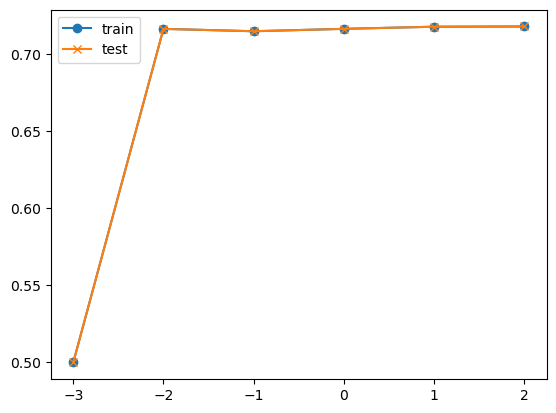

In [70]:
plt.plot(c_vals, np.mean(cv_train_roc_auc, axis = 0), '-o', label = 'train')
plt.plot(c_vals, np.mean(cv_test_roc_auc, axis = 0),'-x', label = 'test')
plt.legend()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
make_interaction = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)


In [73]:
X_interact = make_interaction.fit_transform(X)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_interact, df['default payment next month'].values, test_size = 0.2, random_state= 24)

In [75]:
print(x_train.shape)
print(x_test.shape)

(21331, 153)
(5333, 153)


In [44]:
#17 features become 153 features

In [45]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_search(k_folds,c_val_exp,pipe_line,x_train,y_train )

C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done with C:100.0


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done with C:10.0


C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


done with C:1.0
done with C:0.1
done with C:0.01
done with C:0.001
Wall time: 9min


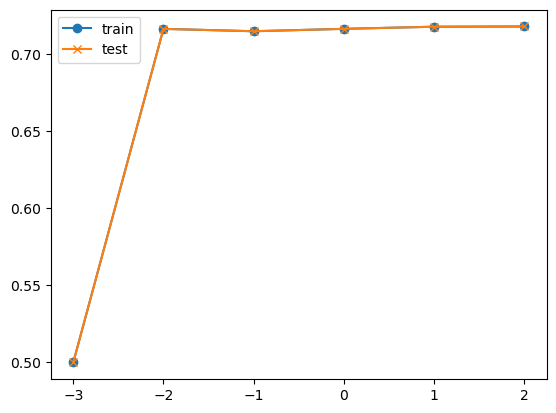

In [77]:
plt.plot(c_vals, np.mean(cv_train_roc_auc, axis = 0), '-o', label = 'train')
plt.plot(c_vals, np.mean(cv_test_roc_auc, axis = 0),'-x', label = 'test')
plt.legend()
